# Sonata Lightning Tools: Table Column Similarity Analyzer

### Takes the query plan data from the reports and provides similarity matrix. Helps in developers in analyzing the reports and reuse the aspects of reports

In [1]:
import pandas as pd
from sklearn.metrics import jaccard_score
import re
import numpy as np
import matplotlib.pyplot as plt
%run lightning_helper.ipynb

## Document metadata with Queries

In [2]:
# Load the data from Excel file
excel_file_path = get_full_file_path('input', 'document-query-plan.csv')
# excel_file_path = 'test_data.csv'
df = pd.read_csv(excel_file_path)

In [3]:
# Extract tables and columns from a query plan
def extract_tables_and_columns(table, column):
    tables = table.split(';')
    columns = column.split(';')
    
    return tables, columns

In [4]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0.0

## Read all the query statements & clense queries
### Find jaccard co-efficient for all the reports

In [5]:
# Calculate Jaccard similarity between tables and columns of query plans
similarity_matrix = []

for i, (table1, column1) in enumerate(zip(df['TableList'], df['ColumnList'])):
    
    table1 = re.sub(r'[^A-Za-z0-9; ]+', '', table1)
    column1 = re.sub(r'[^A-Za-z0-9; ]+', '', column1)
    
    tables1, columns1 = extract_tables_and_columns(table1, column1)
    row_similarities = []
    
    for j, (table2, column2)  in enumerate(zip(df['TableList'], df['ColumnList'])):
         
        table2 = re.sub(r'[^A-Za-z0-9; ]+', '', table2)
        column2 = re.sub(r'[^A-Za-z0-9; ]+', '', column2)
    
        tables2, columns2 = extract_tables_and_columns(table2, column2)
        
        tables_similarity = jaccard_similarity(set(tables1), set(tables2))
        columns_similarity = jaccard_similarity(set(columns1), set(columns2))
        
        average_similarity = (tables_similarity + columns_similarity) / 2
        row_similarities.append(average_similarity)
       
    
    similarity_matrix.append(row_similarities)

In [6]:
# print(similarity_matrix)

## Similarity heatmap for all the reports based on Query statemetns

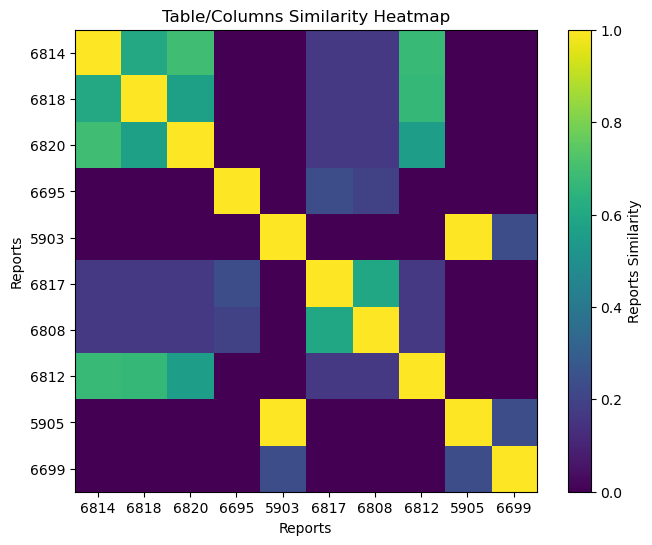

In [7]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Reports Similarity')
plt.title('Table/Columns Similarity Heatmap')
plt.xlabel('Reports')
plt.ylabel('Reports')
plt.xticks(range(len(similarity_matrix)), df['DocId'])
plt.yticks(range(len(similarity_matrix)),  df['DocId'])
plt.show()

In [37]:
# Index of the specific record you want to match
row_index_of_report = 4  # Replace this with the desired index

# Get matching rows from the DataFrame
matching_row = df.loc[row_index_of_report]

matching_row

DocId                                                       5903
DpId                                                         DP0
DpName                                                   Query 1
DsId                                                        5636
QueryPlan      {"queryplan":{"@custom":"false","@editable":"t...
TableCount                                                     3
ColumnCount                                                    8
Complexity                                                  True
TableList      Article_Color_Lookup;Article_Lookup_Criteria;S...
ColumnList     Family_name;Category;Article_id;Article_label;...
Name: 4, dtype: object

In [38]:
# Threshold for similarity
threshold = .8

In [39]:
# Get the row of the specific record from the similarity matrix
specific_record_similarity = similarity_matrix[row_index_of_report]

In [40]:
print(specific_record_similarity)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.23717948717948717]


In [41]:
# Find rows with similarity above the threshold
matching_indices = np.where(np.array(specific_record_similarity) > threshold)[0]

# Print matching indices
print("Matching indices:", matching_indices)

# Get matching rows from the DataFrame
matching_rows = df.loc[matching_indices]

# Print matching rows
print("Matching rows:")
print(matching_rows)

Matching indices: [4 8]
Matching rows:
   DocId DpId   DpName  DsId  \
4   5903  DP0  Query 1  5636   
8   5905  DP0  Query 1  5636   

                                           QueryPlan  TableCount  ColumnCount  \
4  {"queryplan":{"@custom":"false","@editable":"t...           3            8   
8  {"queryplan":{"@custom":"false","@editable":"t...           3            8   

   Complexity                                          TableList  \
4        True  Article_Color_Lookup;Article_Lookup_Criteria;S...   
8        True  Article_Color_Lookup;Article_Lookup_Criteria;S...   

                                          ColumnList  
4  Family_name;Category;Article_id;Article_label;...  
8  Family_name;Category;Article_id;Article_label;...  
